In [276]:
!ls .

1_线性回归.pdf
for i in range(25):.py.py
house price.ipynb
house-prices-advanced-regression-techniques
simple sample and evaluation.ipynb


In [277]:
!ls ./house-prices-advanced-regression-techniques/

data_description.txt  test.csv
sample_submission.csv train.csv


In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Preprocessing

In [279]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv') # ./中的'.'代表当前目录
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('./house-prices-advanced-regression-techniques/sample_submission.csv')

In [280]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [281]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [282]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [284]:
train_price = train.SalePrice.values
test_ID = test.Id.values

train.SalePrice.values会返回一个含有所有saleprice的数组，而train['SalePrice']会返回 数据框，即包含索引

In [285]:
train.drop(['Id', 'SalePrice'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

axis = 1表示按列操作，inplace默认值为false，即不改变原数据并赋给一个新变量new_train，而true则表示直接修改原数据

In [286]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [287]:
num_train = len(train)
num_train

1460

In [288]:
# 合并训练集，方便后续处理：如对数化，标准化等

data = pd.concat([train, test], axis = 0).reset_index(drop = True)
data.shape

(2919, 79)

In [289]:
data.dtypes.value_counts()

object     43
int64      25
float64    11
Name: count, dtype: int64

处理NA值，首先有80%及以上NA值的特征直接删除。然后分别对object类型的NA赋“NULL”，对dtype类型的NA值赋中值或均值

<Axes: >

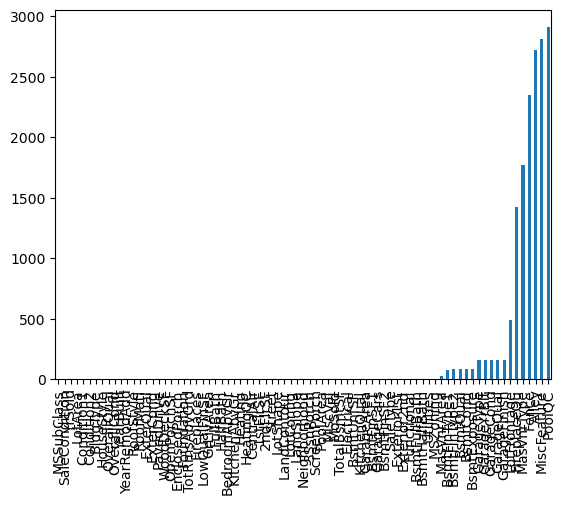

In [290]:
data.isna().sum().sort_values().plot(kind = 'bar')

In [291]:
data.drop(data.isna().mean()[data.isna().mean() > 0.8].index.tolist(), axis = 1, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [292]:
data.loc[:, data.dtypes[data.dtypes != 'object'].index] = data.loc[:, data.dtypes[data.dtypes != 'object'].index].fillna(data.loc[:, data.dtypes[data.dtypes != 'object'].index].median())

In [293]:
data.loc[:, data.dtypes[data.dtypes == 'object'].index] = data.loc[:, data.dtypes[data.dtypes == 'object'].index].fillna("NULL")

In [294]:
data.isna().sum().sum()

0

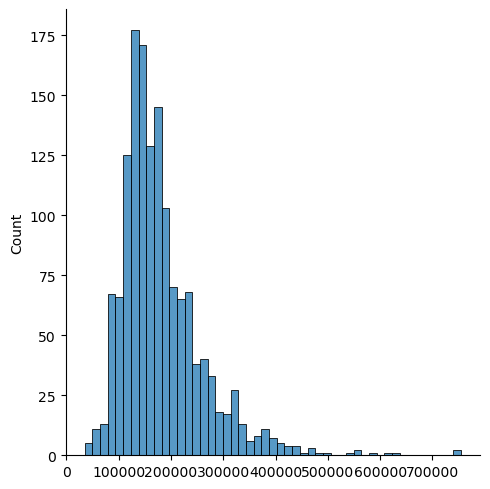

In [295]:
import seaborn as sns

sns.displot(train_price)

这个图像是右偏的，但我们一般希望数据是正态分布的，所以要进行正态化

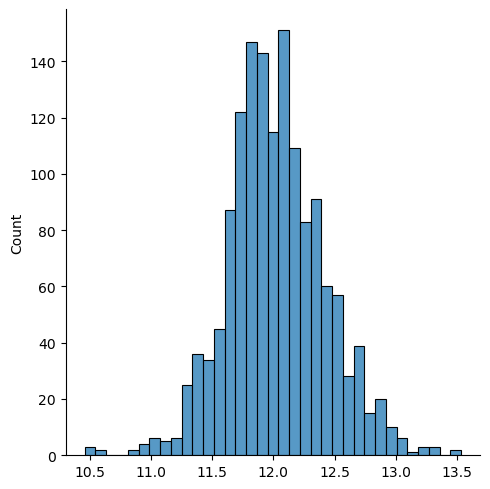

In [296]:
sns.displot(np.log1p(train_price))

log1p(x)=log(1+x)，所以np.log1p(x)与np.expm1(x)互逆，expm1(x) = exp(x) - 1

In [297]:
from sklearn.preprocessing import OneHotEncoder
cat_features = OneHotEncoder().fit_transform(data[data.columns[data.dtypes == 'object']])
cat_features.shape

(2919, 257)

In [298]:
cat_features[0].todense()

matrix([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
num_features = StandardScaler().fit_transform(data[data.columns[data.dtypes != 'object']])
num_features.mean(0), num_features.std(0)

(array([ 3.95557364e-17,  2.40985717e-16,  3.40787883e-17, -1.66742643e-16,
         3.02449246e-16, -5.56214509e-16,  6.81575766e-16,  4.38155849e-17,
        -5.11181824e-17,  7.05917757e-17,  1.30229655e-16,  1.55788746e-16,
        -1.29012556e-16, -2.19077925e-17, -2.19077925e-17,  1.43617751e-16,
         7.85029230e-17, -9.73679665e-18,  7.05917757e-17, -2.55590912e-17,
         2.54373813e-16, -5.24569920e-16,  2.53156713e-16,  5.35523816e-17,
         1.61874244e-16,  1.32663854e-16, -5.90293297e-17, -2.79932904e-17,
        -4.25984854e-17,  6.69404770e-17, -1.21709958e-17,  6.32891782e-17,
         2.43419916e-18,  4.86839833e-18,  1.24144157e-16,  6.49310456e-14]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

In [301]:
features = np.concatenate([cat_features.todense(), num_features], axis = 1)

In [302]:
type(features)

numpy.matrix

如果数据是 NumPy 数组，使用 np.concatenate。
如果数据是 Pandas DataFrame，使用 pd.concat。

In [317]:
features

matrix([[ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         -1.55218353,  0.15764553],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         -0.44692486, -0.60296158],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.02675338,  0.15764553],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.02675338, -1.36356868],
        [ 0.        ,  0.        ,  0.        , ...,  1.14431218,
          0.28991426, -1.36356868],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.7635925 , -1.36356868]])

In [304]:
train_features = features[:num_train]
test_features = features[num_train:]
type(train_features)

numpy.matrix

In [305]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [306]:
train_price

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [307]:
train_price_log = np.log1p(train_price)
train_price_log

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [308]:
scaler = StandardScaler()
scaler.fit(train_price_log.reshape(-1, 1))

StandardScaler()

In [309]:
train_price_scaled = scaler.transform(train_price_log.reshape(-1, 1))
train_price_scaled.mean(), train_price_scaled.std()

(-3.990719474817001e-15, 1.0)

In [310]:
model = Ridge()
model.fit(np.asarray(train_features), train_price_scaled)

Ridge()

In [319]:
def prediction(model, features):
    return np.expm1(scaler.inverse_transform(model.predict(features)))

In [312]:
train_pred = prediction(model, np.asarray(train_features))

In [313]:
train_pred

array([[206340.84699505],
       [198722.87938404],
       [215593.54624534],
       ...,
       [269645.59580495],
       [147099.45514788],
       [141798.42798894]])

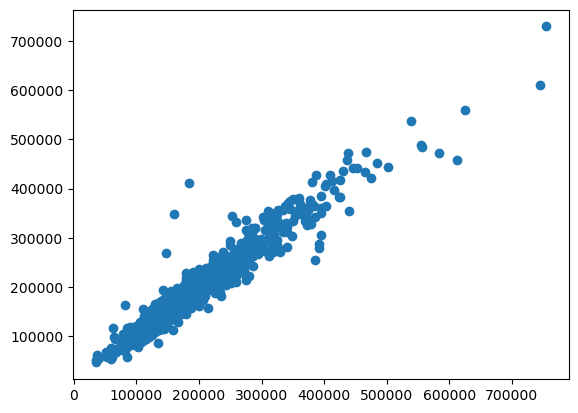

In [314]:
plt.scatter(train_price, train_pred)

In [321]:
model2 = LinearRegression()
model2.fit(np.asarray(train_features), train_price_scaled)

LinearRegression()

In [350]:
np.asarray(train_features)

array([[ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -1.55218353,  0.15764553],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.44692486, -0.60296158],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         1.02675338,  0.15764553],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.31720853,
        -0.44692486,  1.67885974],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.81534442,  1.67885974],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.0785053 ,  0.15764553]])

In [351]:
model2.predict(np.asarray(train_features))

array([[ 0.51900864],
       [ 0.47719574],
       [ 0.61864853],
       ...,
       [ 1.32103348],
       [-0.38629532],
       [-0.35606766]])

In [323]:
train_pred2 = prediction(model2, np.asarray(train_features))

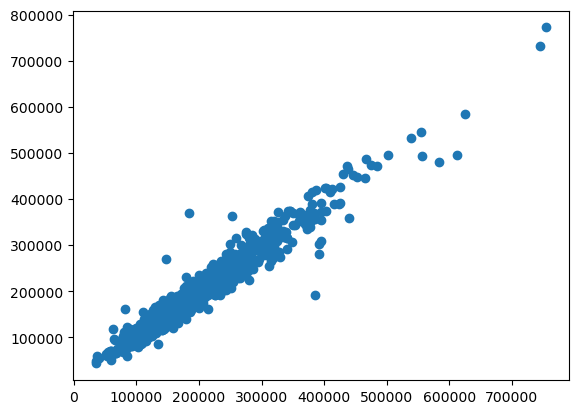

In [324]:
plt.scatter(train_price, train_pred2)

In [357]:
model3 = Lasso(alpha = 0.1)
model3.fit(np.asarray(train_features), train_price_scaled)

Lasso(alpha=0.1)

In [358]:
np.asarray(train_features)

array([[ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -1.55218353,  0.15764553],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.44692486, -0.60296158],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         1.02675338,  0.15764553],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.31720853,
        -0.44692486,  1.67885974],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.81534442,  1.67885974],
       [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
        -0.0785053 ,  0.15764553]])

In [359]:
model3.predict(np.asarray(train_features))

array([ 0.43608982, -0.03108462,  0.54431364, ...,  0.54178201,
       -0.69543947, -0.60123528])

In [360]:
train_pred3 = np.expm1(scaler.inverse_transform(model3.predict(np.asarray(train_features)).reshape(-1, 1)))
train_pred3

array([[198429.36096641],
       [164660.13595696],
       [207192.5393091 ],
       ...,
       [206983.19102396],
       [126291.98389723],
       [131133.22027299]])

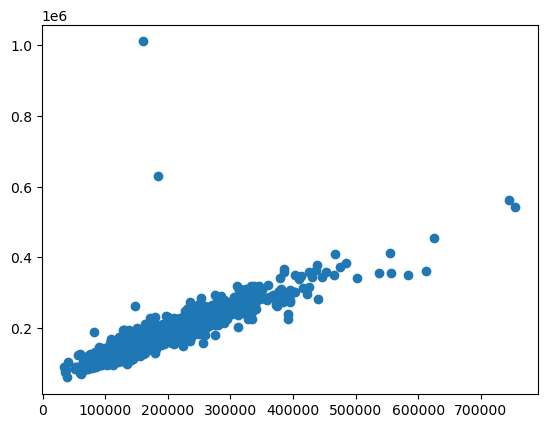

In [361]:
plt.scatter(train_price, train_pred3)

In [266]:
from sklearn.metrics import mean_squared_error as mse
# metrics包提供了一些用于模型评估的函数

In [267]:
np.sqrt(mse(train_price, train_pred))

20127.767359390713

In [325]:
np.sqrt(mse(train_price, train_pred2))

17910.7084045642

In [347]:
np.sqrt(mse(train_price, train_pred3))

41364.81549756374